<a href="https://colab.research.google.com/github/ljy9969/Study/blob/master/22-03-16~17%20Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/타이타닉/train.csv')
test = pd.read_csv('/content/drive/MyDrive/타이타닉/test.csv')

In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.shape

(891, 12)

In [ ]:
test.shape

(418, 11)

In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns # matplot 대신 seaborn으로 데이터 시각화
sns.set() # setting seaborn default for plots

In [ ]:
def bar_chart(feature): # 바 그래프 보여주는 함수
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

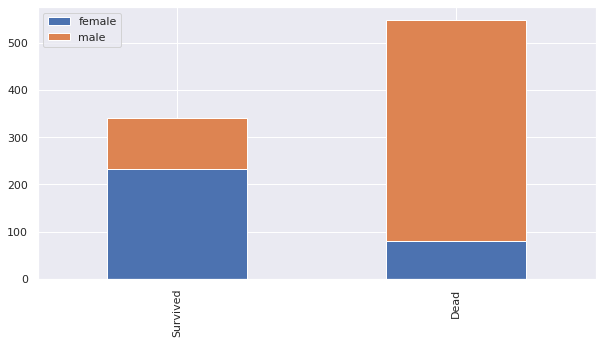

In [ ]:
bar_chart('Sex') # 여자가 살 확률이 높다

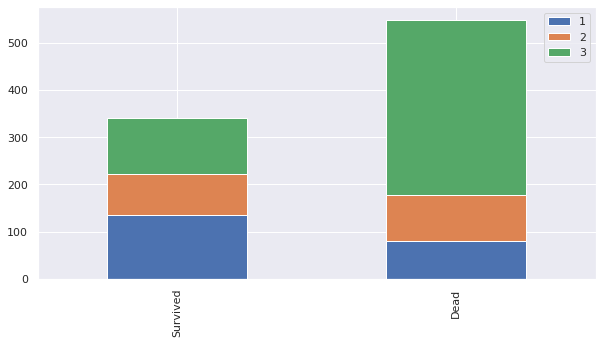

In [ ]:
bar_chart('Pclass') # 3등급이 많이 죽었다

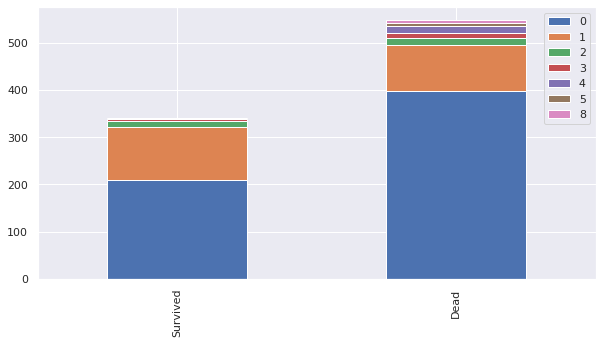

In [ ]:
bar_chart('SibSp') # 가족이 있으면 살 확률이 높다

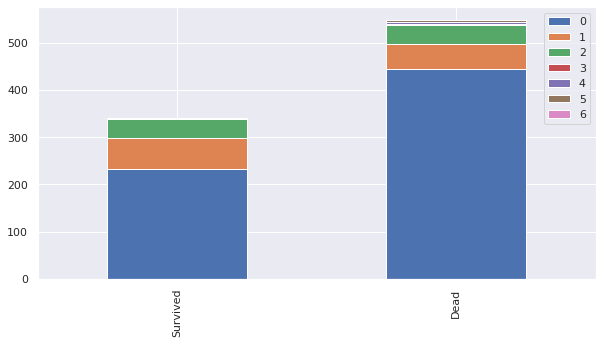

In [ ]:
bar_chart('Parch') # 가족이 있으면 살 확률이 높다

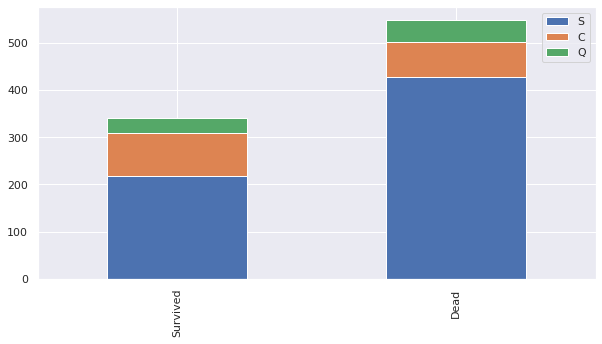

In [ ]:
bar_chart('Embarked') # 탑승지가 영향을 그닥 주지는 않는 것 같다

In [ ]:
train_test_data = [train, test] # combining train and test dataset

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [ ]:
train['Title'].value_counts() # Mr, Miss, Mrs 호칭의 갯수 확인

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [ ]:
test['Title'].value_counts() # Mr, Miss, Mrs 호칭의 갯수 확인

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [ ]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


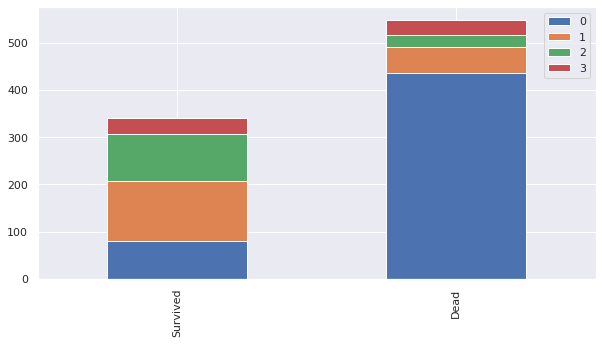

In [ ]:
bar_chart('Title') # Mr가 상대적으로 많이 죽고, Miss, Mrs가 많이 살았다

In [ ]:
# delete unnecessary feature from dataset 이름 지우기
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


In [ ]:
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

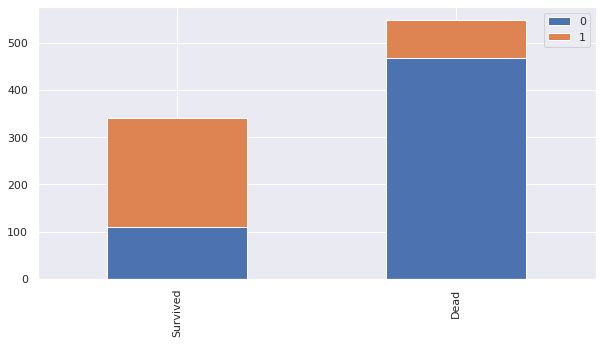

In [ ]:
bar_chart('Sex') # 남자가 많이 죽었다

In [ ]:
# Age NaN에 평균 나이 넣는 것이 아니라 호칭에 따른 평균값을 넣기
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [ ]:
train.head(30)
train.groupby("Title")["Age"].transform("median")

0      30.0
1      35.0
2      21.0
3      35.0
4      30.0
       ... 
886     9.0
887    21.0
888    21.0
889    30.0
890    30.0
Name: Age, Length: 891, dtype: float64

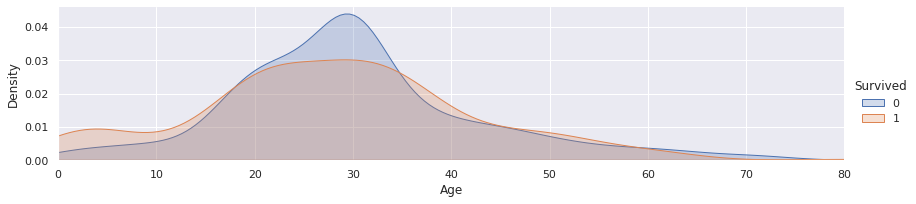

In [ ]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4) # (0: 사망, 1: 생존)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
 
plt.show() # 젊은 층이 상대적으로 많이 죽었다 

(0.0, 20.0)

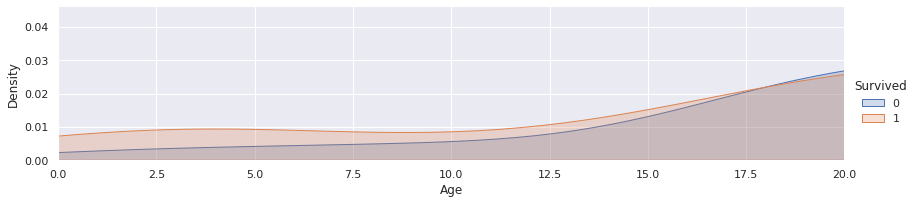

In [ ]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4) # 0 ~ 20살
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(0, 20)

(20.0, 30.0)

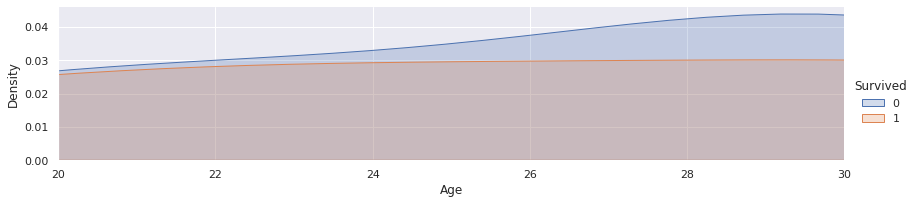

In [ ]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4) # 20 ~ 30살
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(20, 30)

(30.0, 40.0)

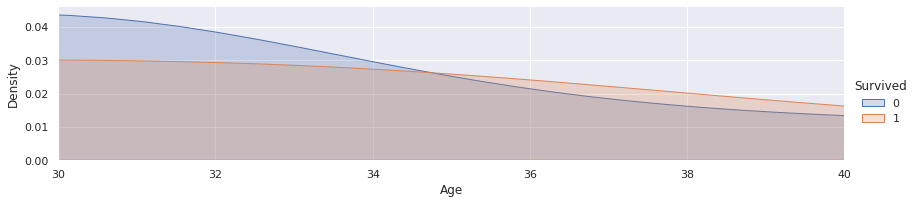

In [ ]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4) # 30 ~ 40살
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(30, 40)

(40.0, 60.0)

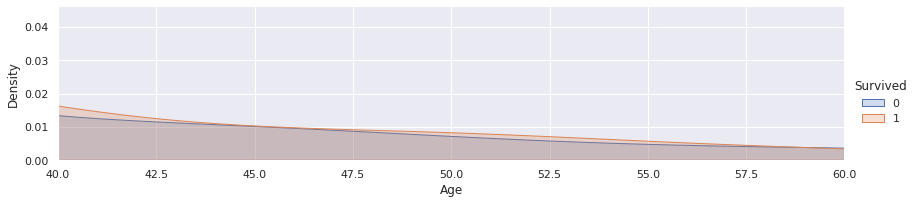

In [ ]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4) # 40 ~ 60살
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(40, 60)

(60.0, 80.0)

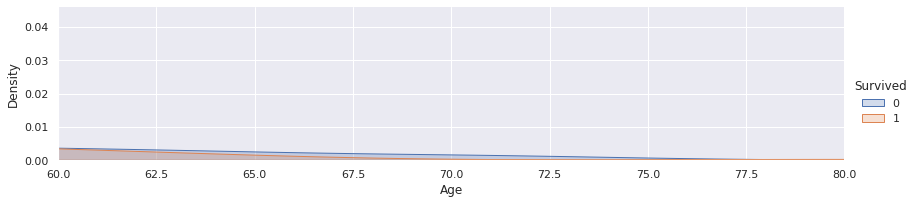

In [ ]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(60)

In [ ]:
# for dataset in train_test_data:                                               # 반복문 설정 시 key와 value의 길이가 같아야 -> 조건문을 쪼개주자 ! 쉼표 때문에 !
#   dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
#   dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
#   dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
#   dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
#   dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [ ]:
for dataset in train_test_data:
  dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0

In [ ]:
for dataset in train_test_data:
  dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1

In [ ]:
for dataset in train_test_data:
  dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2

In [ ]:
for dataset in train_test_data:
  dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3

In [ ]:
for dataset in train_test_data:
  dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


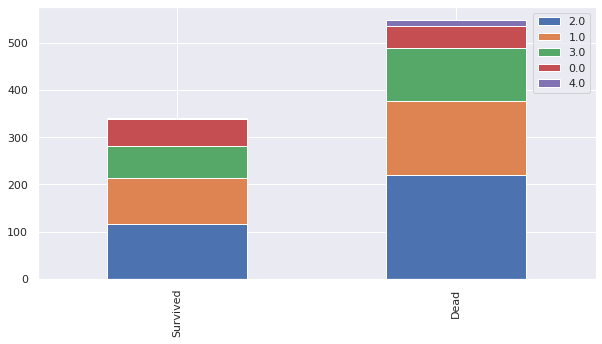

In [ ]:
bar_chart('Age') # 나이대별 생존률

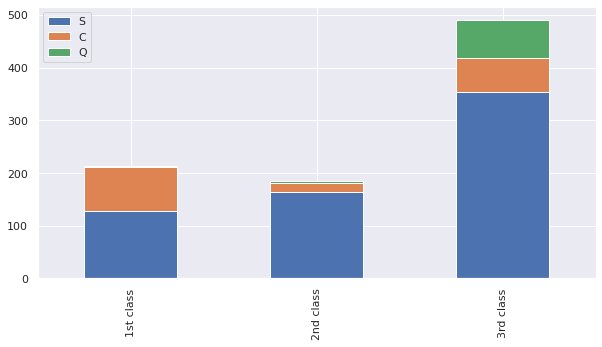

In [ ]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts() # 탑승지와 좌석 등급이 생존율에 영향을 미치나? 등급별로 S에서 탄 비율이 반 이상
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [ ]:
for dataset in train_test_data: # 탑승지 NaN을 S로 채우기
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2} # 탑승지를 숫자로 매핑
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [ ]:
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True) # 
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train.head(50)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,2,0
6,7,0,1,0,3.0,0,0,17463,51.8625,E46,0,0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,0,3
8,9,1,3,1,2.0,0,2,347742,11.1333,NaN,0,2
9,10,1,2,1,0.0,1,0,237736,30.0708,NaN,1,2


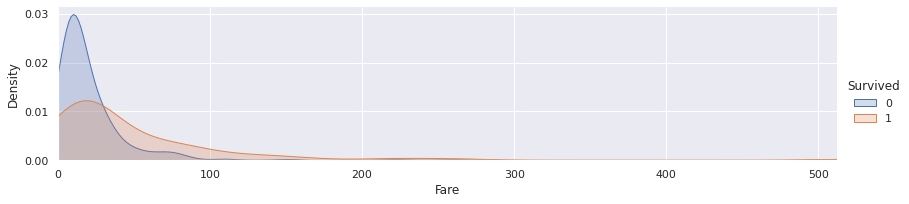

In [ ]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4) # 운임이 싼 사람들이 상대적으로 많이 죽음
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
 
plt.show()  

(0.0, 20.0)

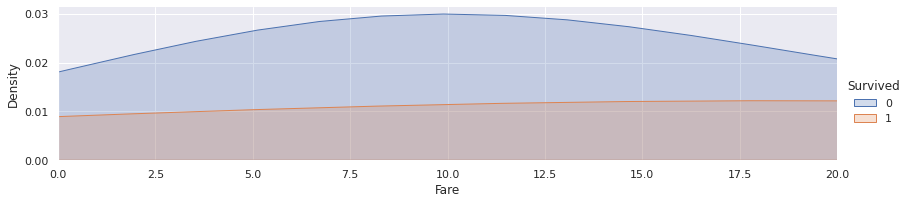

In [ ]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 20)

(0.0, 30.0)

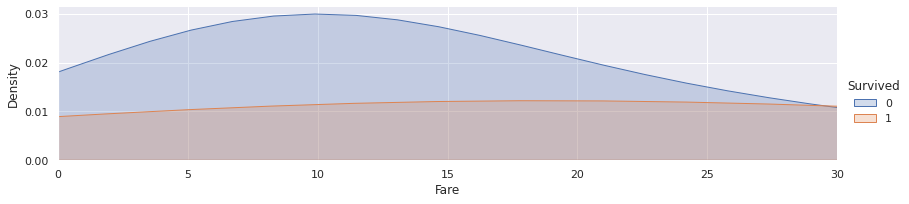

In [ ]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 30)

(0.0, 512.3292)

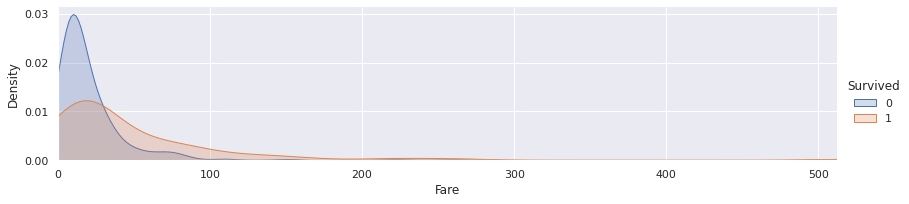

In [ ]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0)

In [ ]:
# for dataset in train_test_data:
#     dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,
#     dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
#     dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
#     dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [ ]:
for dataset in train_test_data:
  dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0

In [ ]:
for dataset in train_test_data:
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1

In [ ]:
for dataset in train_test_data:
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2

In [ ]:
for dataset in train_test_data:
  dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


In [ ]:
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [ ]:
for dataset in train_test_data: # Cabin 열에서 뒤에 숫자 제외하고 문자만 따줌
    dataset['Cabin'] = dataset['Cabin'].str[:1]

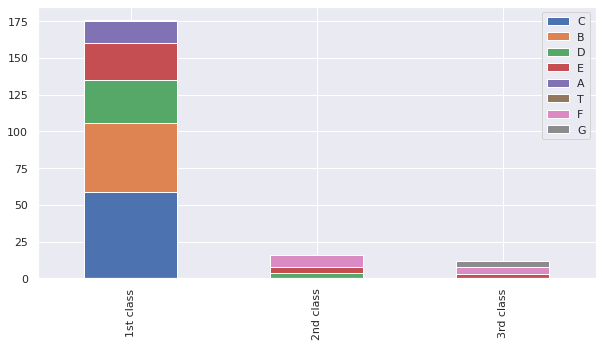

In [ ]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [ ]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8} # Normalization의 기준은? 표준화(Standardization)?
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [ ]:
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True) # 등급별 페어의 중간값을 운임 NaN에 넣어줌
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [ ]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1 # 가족과 함께 탔는지 여부 파악 위해서, 가족 수를 구함. 근데 + 1은 가족 수에 본인도 포함하는 건가?
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

(0.0, 11.0)

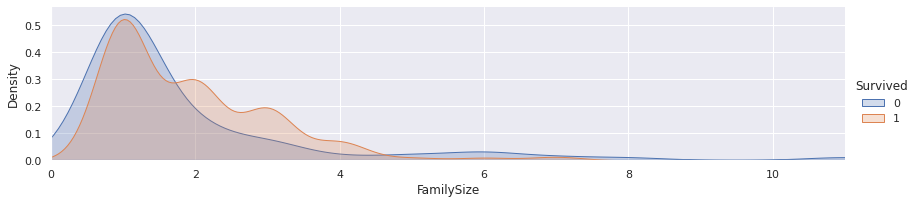

In [ ]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4) # 가족이 있으면 상대적으로 더 생존함
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [ ]:
# feature scailing
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


In [ ]:
features_drop = ['Ticket', 'SibSp', 'Parch'] # Cabin에 운임 넣어주고, Family Size에 SibSp, Parch 넣었기 때문에 data set에서 지움
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [ ]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [ ]:
train_data.head(10)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0
5,3,0,2.0,0.0,2.0,2,0,0.0
6,1,0,3.0,2.0,1.6,0,0,0.0
7,3,0,0.0,1.0,2.0,0,3,1.6
8,3,1,2.0,0.0,2.0,0,2,0.8
9,2,1,0.0,2.0,1.8,1,2,0.4


In [ ]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Cabin       891 non-null    float64
 6   Embarked    891 non-null    int64  
 7   Title       891 non-null    int64  
 8   FamilySize  891 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 62.8 KB


In [ ]:
from sklearn.model_selection import KFold                                       # Cross Validation (K-fold)
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [ ]:
clf = KNeighborsClassifier(n_neighbors = 13)                                    # kNN. n_neighbors?
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring) # cross_val_score 파라미터들의 의미?
print(score)

[0.81111111 0.7752809  0.82022472 0.83146067 0.85393258 0.83146067
 0.82022472 0.80898876 0.83146067 0.80898876]


In [ ]:
# kNN Score
round(np.mean(score)*100, 2)

81.93

In [ ]:
clf = DecisionTreeClassifier()                                                  # Decision Tree
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.76666667 0.80898876 0.78651685 0.7752809  0.87640449 0.76404494
 0.82022472 0.82022472 0.74157303 0.78651685]


In [ ]:
# decision tree Score
round(np.mean(score)*100, 2)

79.46

In [ ]:
clf = RandomForestClassifier(n_estimators=13)                                   # Ramdom Forest. n_estimators?
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.78888889 0.82022472 0.80898876 0.76404494 0.88764045 0.80898876
 0.79775281 0.82022472 0.74157303 0.82022472]


In [ ]:
# Random Forest Score
round(np.mean(score)*100, 2)

80.59

In [ ]:
clf = GaussianNB()                                                              # Naive Bayes
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.85555556 0.73033708 0.75280899 0.75280899 0.70786517 0.80898876
 0.76404494 0.80898876 0.86516854 0.83146067]


In [ ]:
# Naive Bayes Score
round(np.mean(score)*100, 2)

78.78

In [ ]:
clf = SVC()                                                                     # SVM
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.83333333 0.79775281 0.83146067 0.82022472 0.84269663 0.82022472
 0.84269663 0.85393258 0.84269663 0.86516854]


In [ ]:
round(np.mean(score)*100,2)

83.5

In [ ]:
clf = SVC()
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

In [88]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [ ]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# < 느낀점 >

*   데이터의 전처리(핸들링, 클렌징)가 대부분을 차지함 - DataFrame loc[ ] 연산자, boolean indexing!

*   상관관계 분석을 위해 데이터를 시각화함 - bar chart(비중), FacetGrid(상대성)

# < 궁금증 >

*   피어슨 상관계수 corr()의 값들의 의미. 음수가 클수록 상관이 있나?

  → -1~1 사이의 값. 0과 가까울수록 상관관계 적음. 통상적으로 +-0.5 이상이어야 유의미함


*   Name에서 Title(호칭)을 추출하기 위해 trian과 test dataset을 합쳐서 한꺼번에 처리 - Mr, Miss, Mrs 중 Mr가 상대적으로 많이 죽음. 성별 있는데 굳이?

  → data가 많으면 많을수록 예측이 정확해지기 때문. Age의 NaN에 평균 나이 넣는 것이 아닌 호칭에 따른 중위값 넣기 위해 필요함


*   결치값 대체할 때 mean(평균)이 아닌 median(중위값)을 사용?

  → mean은 value를 모두 포함하여 Outlier(이상치)에 민감하게 반응하므로 중위값을 사용


*   사이킷런의 교차검증, 'cross_val_score()' API 파라미터들(clf, target, n_jobs, scoring)의 의미?
cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)

  → clf는 검증에 사용하려는 모델, 학습 data, test data, cv 몇 번 검증할지, n_jobs는 컴퓨터 리소스를 얼마나 사용할지, scoring은 정확도


*   for문으로 boolean indexing(복합 조건) 돌릴 때 ValueError(반복문 설정 시 key, value 값의 길이가 같아야?) 뜸

  → 각 조건으로 반복문 돌려서 해결, 조건 끝에 ',' 삭제!


*   Cabin을 숫자로 Mapping(Feature Scailing) 할 때, 왜 정수가 아닌 실수? 각 value의 중요도?

  → 각 value 간의 편차를 줄이기 위한 정규화(Normalization)
  

*   Sibsp와 Parch Feature를 합쳐 FamilySize(가족 동승 유무)를 새로 만들어 줄 때, 왜 1을 더하나?

  → 본인 포함

## Feature 간의 상관관계
피어슨 상관계수(Pearson Correlation Coeffcient)

두 변수간 피어슨 상관계수를 구하면 (-1, 1)사이의 값을 얻을 수 있다.

-1로 갈 수록 음의 상관관계, 
1로 갈수록 양의 상관관계,

0에 근접할 수록 상관관계가 없다.

In [ ]:
train.corr()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
Survived,1.000000,-0.338481,0.543351,-0.090499,0.292884,-0.279477,0.106811,0.445792,0.016639
Pclass,-0.338481,1.000000,-0.131900,-0.314046,-0.693736,0.864697,0.045702,-0.164205,0.065997
Sex,0.543351,-0.131900,1.000000,-0.130828,0.216932,-0.093314,0.116569,0.557890,0.200988
Age,-0.090499,-0.314046,-0.130828,1.000000,0.071564,-0.265643,-0.036063,-0.171512,-0.269433
Fare,0.292884,-0.693736,0.216932,0.071564,1.000000,-0.668376,-0.008131,0.278740,0.415087
Cabin,-0.279477,0.864697,-0.093314,-0.265643,-0.668376,1.000000,-0.041238,-0.141768,0.057629
Embarked,0.106811,0.045702,0.116569,-0.036063,-0.008131,-0.041238,1.000000,0.049699,-0.080281
Title,0.445792,-0.164205,0.557890,-0.171512,0.278740,-0.141768,0.049699,1.000000,0.366883
FamilySize,0.016639,0.065997,0.200988,-0.269433,0.415087,0.057629,-0.080281,0.366883,1.000000


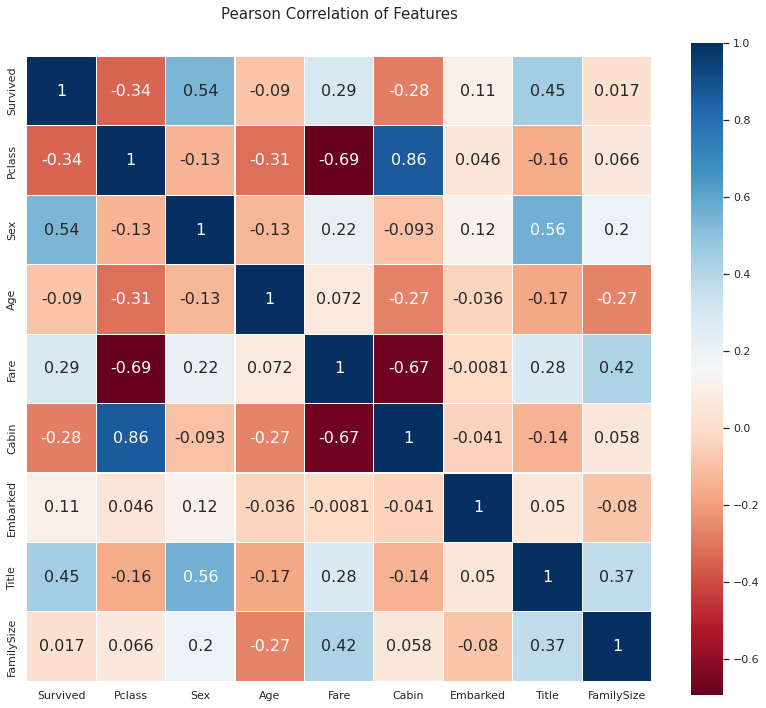

In [ ]:
# Matplotlib과 Seaborn(Heatmap)으로 feature들 간의 상관관계 구하기

heatmap_data = train[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked',
                        'Title', 'FamilySize']]

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})
del heatmap_data

pandas.DataFrame.corr 공식문서

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

Reference

https://www.youtube.com/watch?v=aqp_9HV58Ls&list=PLUu-A-mtBg8ZLWT7tXZvEBDGVhX1xo-7r&index=5

https://github.com/minsuk-heo/kaggle-titanic/blob/master/titanic-solution.ipynb